In [1]:
!pip install opencv-python
!pip install numpy


In [7]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet(r"C:\Users\saisa\Downloads\yolov3.weights", r"C:\Users\saisa\Downloads\yolov3.cfg.txt")

# Load the COCO class names
with open(r"C:\Users\saisa\Downloads\coco.names.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]



In [8]:
# Load an image
image = cv2.imread(r"C:\Users\saisa\Downloads\dog_bike_car.jpg")

# Get the image dimensions
height, width, channels = image.shape

# Convert image to blob for YOLO input
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)


In [9]:
# Forward pass the blob through the network
outs = net.forward(output_layers)

# Initialize lists for detected bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

# Analyze the output
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            # Get the coordinates of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Maximum Suppression to remove duplicate boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


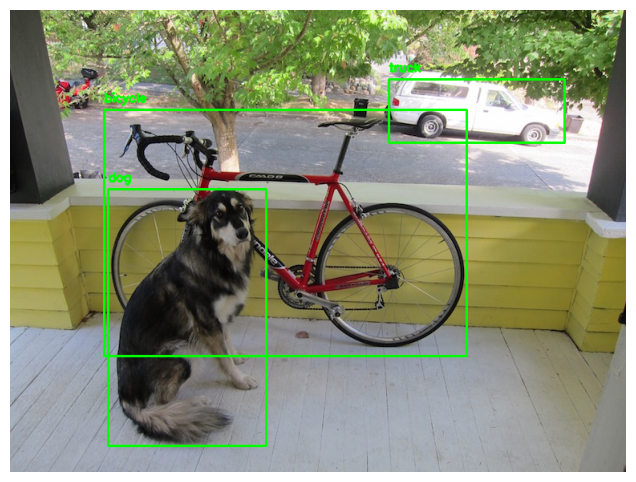

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r"C:\Users\saisa\Downloads\dog_bike_car.jpg")

# Ensure the image is loaded correctly
if img is None:
    print("Error: Could not load image")
else:
    # Convert the image from BGR (OpenCV default) to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform object detection (this is part of your code)
    
    for i in indices:
        # Get the bounding box coordinates and class ID
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])

        # Draw bounding box and label
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img_rgb, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")  # Hide axes
    plt.show()

